In [95]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

# 1. Predictable adversary for Matching Pennies

Text(0, 0.5, 'Expected percent of rounds won by adversary')

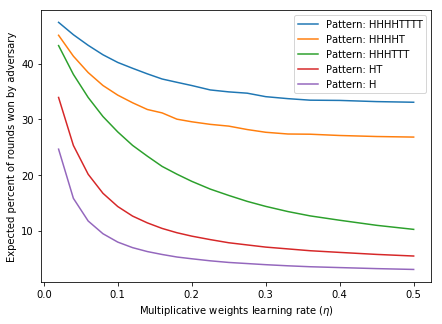

In [388]:
etas = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.225, 0.25, 0.275, 0.3, 0.33, 0.36, 0.4, 0.45, 0.5]

# Data collected from running experiments
user0 = np.array([24.654785431657658,15.82723917333197,11.752530629180852,9.466831302492281,7.96632430307373,6.971015726924852,6.265387661212108,5.741040993254473,5.287328896195717,4.971337098466764,4.605089159636972,4.312190263177447,4.111796146515463,3.910332028510499,3.7089685322070625,3.5412663322910363,3.3895266815378493,3.203609751639628,3.055080577406406])
user01 = np.array([33.936100282462675,25.324974707158905,20.1455843602767,16.726403049830612,14.350037905139528,12.637748321602125,11.415898219074283,10.418221296725811,9.647084912278784,9.035911443768946,8.41339899933561,7.8491551520437435,7.456046342101094,7.068045460372003,6.74266747460434,6.416667197077174,6.115495239174722,5.754184988314229,5.465533952264657])
user000111 = np.array([43.248754022403425,38.08261864432762,33.937780694631456,30.511324047200805,27.74771233220775,25.334206218505816,23.39402638295887,21.55476206859639,20.159933073299666,18.8774000651919,17.484157475759087,16.344883716858963,15.278897296185606,14.378770949654369,13.449129678236101,12.67236069133128,11.88954473820298,10.97641675952053,10.250915532610078])
user00001 = np.array([45.10451170477383,41.3535198815495,38.40891447946401,36.08369090020636,34.35394694928659,32.98716679894802,31.77776010642741,31.16240305027488,30.036945021841987,29.570064865925776,29.108168228565074,28.79176558494258,28.17698366995371,27.685993524565944,27.37539411491588,27.337343446525175,27.108020590975602,26.924351368077954,26.822327163114846])
user00001111 = np.array([47.423202162827124,45.20573662109415,43.300451467071724,41.60279389002862,40.22619636239616,39.176546151983096,38.17555213111831,37.25045453583515,36.658056763974486,36.080535171530116,35.287629105196444,34.939756185618734,34.7045252896248,34.08001451419861,33.72334905119755,33.44963683160262,33.4053234115527,33.19298487927101,33.07786409545071])

# Plot percentages
plt.figure(figsize=(7,5))
plt.plot(etas, user00001111)
plt.plot(etas, user00001)
plt.plot(etas, user000111)
plt.plot(etas, user01)
plt.plot(etas, user0)

plt.legend(["Pattern: HHHHTTTT", "Pattern: HHHHT", "Pattern: HHHTTT", "Pattern: HT", "Pattern: H"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Expected percent of rounds won by adversary")

# 1. Predictable adversary for Rock, Paper, Scissors

Text(0, 0.5, 'Expected percent of rounds won by adversary')

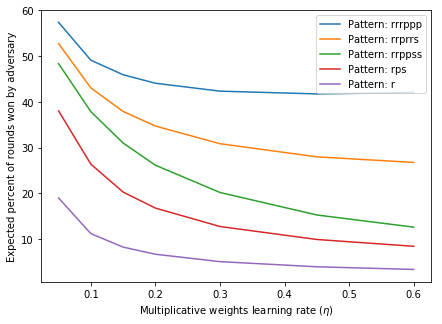

In [389]:
etas = [0.05, 0.1, 0.15, 0.2, 0.3, 0.45, 0.6]

# Data collected from running experiments
user0 = np.array([18.99038138188998,11.198516727884314,8.250940531424105,6.6947968495297525,5.080253301737087,3.9580481260848543,3.3738659856149114])
user012 = np.array([38.01878181751847,26.372290734718106,20.27827317634993,16.785340486066865,12.755751935934281,9.924121626591779,8.434062873127331])
user001122 = np.array([48.34454127235023,37.854462256371605,30.99820692450545,26.146973039977574,20.191431015456157,15.276203185981597,12.61919099409875])
user001002 = np.array([52.73254856283521,43.0282028211937,37.893280178217374,34.70339081850827,30.851379544997076,27.977984274371426,26.761315938961193])
user000111 = np.array([57.36562319299867,49.09500371979647,45.91404475097978,44.06326814489778,42.33290983357493,41.728231146099944,42.033787277130536])

# Plot percentages
plt.figure(figsize=(7,5))
plt.plot(etas, user000111)
plt.plot(etas, user001002)
plt.plot(etas, user001122)
plt.plot(etas, user012)
plt.plot(etas, user0)

plt.legend(["Pattern: rrrppp", "Pattern: rrprrs", "Pattern: rrppss", "Pattern: rps", "Pattern: r"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Expected percent of rounds won by adversary")

# 2. Properties of the worst-case adversary pattern
Length of patterns is $n^{(h+1)}$. This is the number of entries in table. It's also the number of possible ways to permute (for example, each pattern never contains a repeated h-gram)

In [390]:
# Matching Pennies
adversary_2_1 = "0011" # 4
adversary_2_2 = "00011101" # 8
adversary_2_3 = "0000111101100101" # 16
adversary_2_4 = "00000111110111001101011000101001" # 32

# Rock, Paper, Scissors
adversary_3_1 = "001121022" # 9
adversary_3_2 = "000111211012212010210022202" # 27
adversary_3_3 = "000011112111011221120110211001212101222122012021200101022102010021000222202200202" # 81

# 3. Worst-case adversary
Lower bound doesn't depend on history length, only on n-strategies. The lower bound seems to be $\frac{1}{n^2}$. We investigate this lower bound below.

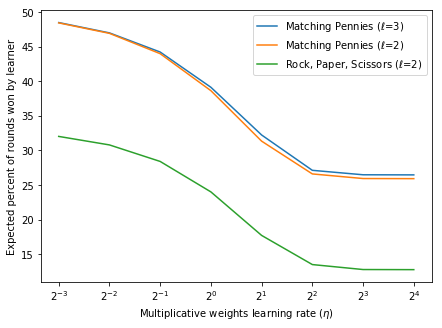

In [393]:
etas = [0.125,0.25,0.5,1,2,4,8,16]

# Percentage of rounds won by the learner
mp = np.array([48.51996786062602,47.02346538312671,44.253305127957724,39.15151795456685,32.24662271589601,27.130732589442207,26.486369417904303,26.470593531066427])
mp2 = np.array([48.47170594303775,46.95732016941841,44.01462819406672,38.65970166233109,31.354074112807133,26.608154306983835,25.94207241368912,25.92593134428556])
rps = np.array([32.03885887342519,30.80770965551784,28.41650394629675,24.007156406968207,17.709262192696812,13.48845431716082,12.769367278404733,12.753628472665667])

# Plot percentages
plt.figure(figsize=(7, 5))
plt.plot(etas, mp)
plt.plot(etas, mp2)
plt.plot(etas, rps)

plt.legend(["Matching Pennies ($\ell$=3)", "Matching Pennies ($\ell$=2)", "Rock, Paper, Scissors ($\ell$=2)"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Expected percent of rounds won by learner")
plt.xscale("log", basex=2)

# 4. Mistake sequence against worst-case adversary
When $\eta$ is really large, the worst-case adversary performs a sequence of actions that forces the learner to make a sequence of mistakes. Hypothesis: this mistake sequence is identical to the adversary's action sequence. <br>

Now we understand that the the learner is forced (by the adversary) to make a mistake when the adversary plays a nonzero action. So, the learner only has a (uniform) chance of winning when the adversary plays 0. Since the adversary plays evenly across all actions, it plays 0 roughly 1 out of every $n$ actions. The learner has a $\frac{1}{n}$ (uniform) chance of predicting that 0 correctly, and this gives us the $\frac{1}{n^2}$ we discovered in the plot above.

In [394]:
def plot_expected_scores(prob_learner_win):
    prob_user_win = 1 - prob_learner_win

    # Expected score after each round
    user_score = np.cumsum(prob_user_win)
    learner_score = np.cumsum(prob_learner_win)
    
    # Set up the plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlabel("Round t")
    plt.ylabel("Expected learner score")

    # Plot expected learner score across rounds t
    plt.plot(user_score)    
    plt.plot(learner_score)
    
    plt.legend(["Adversary", "Learner"])

mistake_sequence == adversary_sequence: True
number of guaranteed mistakes: 96
number of chances to get it right: 104


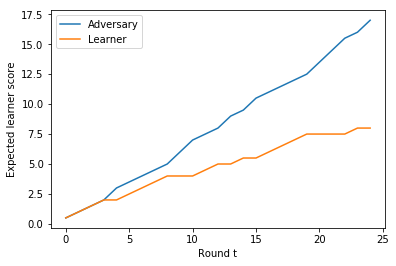

In [428]:
# Matching pennies (n=2, h=3)
prob_learner_win_16 = np.array([0.5,0.5,0.5,0.5,1.1253516205509617e-7,0.4999999999999999,0.5000000000000028,0.5000000000000003,0.49999999999999756,1.1253516205509487e-7,1.1253516205509517e-7,0.5000000000000003,0.499999999999998,1.1253516205509495e-7,0.5000000000000008,1.1253516205509472e-7,0.500000000000001,0.4999999999999985,0.5000000000000009,0.5000000000000002,1.1253516205509491e-7,1.1253516205509513e-7,1.1253516205509535e-7,0.4999999999999997,1.125351620550951e-7,1.1253516205509505e-7,0.5000000000000012,0.49999999999999917,1.1253516205509514e-7,0.49999999999999983,1.1253516205509511e-7,0.5,0.5000000000000009,0.49999999999999994,0.4999999999999993,1.125351620550952e-7,1.1253516205509503e-7,1.1253516205509514e-7,1.1253516205509534e-7,0.4999999999999996,1.1253516205509513e-7,1.125351620550951e-7,0.5000000000000012,0.4999999999999991,1.1253516205509515e-7,0.4999999999999999,1.1253516205509509e-7,0.5,0.5000000000000009,0.49999999999999983,0.49999999999999933,1.1253516205509518e-7,1.1253516205509505e-7,1.1253516205509515e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000012,0.499999999999999,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.5,0.5000000000000008,0.49999999999999994,0.49999999999999933,1.1253516205509517e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999998,1.1253516205509515e-7,1.1253516205509514e-7,0.5000000000000011,0.49999999999999906,1.1253516205509515e-7,0.4999999999999999,1.1253516205509511e-7,0.4999999999999999,0.5000000000000009,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509507e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.4999999999999998,1.1253516205509514e-7,0.4999999999999999,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997,1.1253516205509515e-7,1.1253516205509513e-7,0.5000000000000011,0.49999999999999906,1.1253516205509514e-7,0.49999999999999983,1.1253516205509514e-7,0.49999999999999994,0.5000000000000008,0.49999999999999983,0.4999999999999993,1.1253516205509518e-7,1.1253516205509506e-7,1.1253516205509518e-7,1.1253516205509534e-7,0.4999999999999997])
prob_learner_win_infinity = (prob_learner_win_16 > 0.1)*0.5
plot_expected_scores(prob_learner_win_infinity[:25])

# They are the same!
mistake_sequence = ''.join([str(m) for m in (prob_learner_win_16 < 0.1)*1])
adversary_sequence = '00001000011001010000111011001010000111101100101000011110110010100001111011001010000111101100101000011110110010100001111011001010000111101100101000011110110010100001111011001010000111101100101000011110'
print("mistake_sequence == adversary_sequence: " + str(mistake_sequence == adversary_sequence))

# Count nonzeros
num_mistakes = np.count_nonzero(np.array([int(x) for x in list(mistake_sequence)]))
print("number of guaranteed mistakes: " + str(num_mistakes))
print("number of chances to get it right: " + str(200 - num_mistakes))

00010020001101201021002202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012
number of guaranteed mistakes: 128
number of chances to get it right: 72


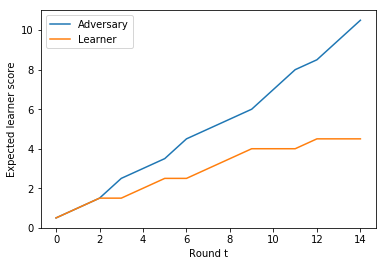

In [431]:
# Rock, Paper, Scissors (n=3, h=2)
prob_learner_win_16 = np.array([0.3333333333333333,0.3333333333333333,0.33333333333331644,1.125351493909801e-7,0.3333333333333321,0.3333333333333195,5.6267584193585295e-8,0.33333333333338666,0.3333333333333373,0.33333333333335885,1.1253514939092963e-7,1.1253514939093125e-7,0.3333333333333892,1.125351493909279e-7,5.626758419359575e-8,0.33333333333338755,1.125351493909297e-7,0.33333333333338533,5.6267584193588756e-8,1.1253514939093393e-7,0.33333333333338283,0.33333333333333104,5.6267584193590145e-8,5.62675841935909e-8,0.3333333333333479,5.626758419358994e-8,0.3333333333333314,0.33333333333333637,0.3333333333333357,1.1253514939093413e-7,1.1253514939093377e-7,1.1253514939093358e-7,5.6267584193589444e-8,1.1253514939093321e-7,1.1253514939093556e-7,0.3333333333333531,1.1253514939093099e-7,5.6267584193590615e-8,5.6267584193585335e-8,1.125351493909305e-7,5.626758419358361e-8,0.33333333333335796,1.1253514939092854e-7,0.3333333333333419,5.626758419358252e-8,1.1253514939093037e-7,0.3333333333333441,0.3333333333333182,5.626758419358548e-8,5.626758419358968e-8,5.626758419359082e-8,0.33333333333334775,5.626758419358995e-8,0.3333333333333314,0.3333333333333363,0.3333333333333357,1.1253514939093413e-7,1.1253514939093377e-7,1.1253514939093362e-7,5.626758419358945e-8,1.125351493909332e-7,1.1253514939093558e-7,0.333333333333353,1.1253514939093098e-7,5.626758419359061e-8,5.6267584193585335e-8,1.125351493909305e-7,5.626758419358361e-8,0.333333333333358,1.1253514939092854e-7,0.333333333333342,5.626758419358251e-8,1.1253514939093035e-7,0.3333333333333445,0.3333333333333182,5.6267584193585474e-8,5.6267584193589715e-8,5.626758419359085e-8,0.3333333333333479,5.626758419358993e-8,0.33333333333333137,0.33333333333333637,0.33333333333333565,1.1253514939093413e-7,1.1253514939093378e-7,1.125351493909336e-7,5.6267584193589444e-8,1.1253514939093325e-7,1.1253514939093557e-7,0.3333333333333529,1.1253514939093102e-7,5.62675841935906e-8,5.626758419358534e-8,1.125351493909305e-7,5.62675841935836e-8,0.33333333333335813,1.1253514939092858e-7,0.3333333333333418,5.626758419358253e-8,1.1253514939093035e-7,0.3333333333333443,0.3333333333333182,5.626758419358548e-8,5.6267584193589715e-8,5.6267584193590834e-8,0.3333333333333479,5.626758419358991e-8,0.3333333333333314,0.33333333333333626,0.3333333333333356,1.1253514939093415e-7,1.1253514939093381e-7,1.125351493909336e-7,5.6267584193589444e-8,1.1253514939093325e-7,1.1253514939093557e-7,0.3333333333333529,1.1253514939093102e-7,5.6267584193590595e-8,5.626758419358533e-8,1.125351493909305e-7,5.62675841935836e-8,0.3333333333333583,1.125351493909286e-7,0.3333333333333415,5.626758419358255e-8,1.1253514939093037e-7,0.333333333333344,0.33333333333331827,5.6267584193585474e-8,5.626758419358971e-8,5.626758419359084e-8,0.3333333333333479,5.6267584193589914e-8,0.33333333333333137,0.3333333333333363,0.3333333333333356,1.1253514939093415e-7,1.1253514939093382e-7,1.125351493909336e-7,5.626758419358945e-8,1.1253514939093324e-7,1.125351493909356e-7,0.33333333333335297,1.1253514939093102e-7,5.6267584193590595e-8,5.626758419358534e-8,1.1253514939093051e-7,5.626758419358359e-8,0.33333333333335974,1.125351493909286e-7,0.33333333333334125,5.626758419358256e-8,1.1253514939093038e-7,0.33333333333334414,0.33333333333331827,5.626758419358547e-8,5.626758419358969e-8,5.626758419359085e-8,0.3333333333333479,5.6267584193589934e-8,0.3333333333333315,0.33333333333333615,0.3333333333333356,1.1253514939093415e-7,1.1253514939093385e-7,1.1253514939093357e-7,5.626758419358945e-8,1.1253514939093328e-7,1.125351493909355e-7,0.333333333333353,1.1253514939093095e-7,5.62675841935906e-8,5.6267584193585354e-8,1.125351493909305e-7,5.626758419358358e-8,0.33333333333335985,1.125351493909286e-7,0.33333333333334114,5.626758419358256e-8,1.1253514939093035e-7,0.3333333333333444,0.33333333333331827,5.626758419358547e-8,5.626758419358969e-8,5.6267584193590854e-8,0.333333333333348,5.62675841935899e-8,0.33333333333333137,0.3333333333333363,0.3333333333333356,1.1253514939093417e-7,1.1253514939093381e-7,1.1253514939093357e-7,5.626758419358945e-8,1.1253514939093325e-7,1.1253514939093552e-7,0.33333333333335297,1.1253514939093098e-7,5.6267584193590576e-8])
prob_learner_win_infinity = (prob_learner_win_16 > 0.1)*0.5
plot_expected_scores(prob_learner_win_infinity[:15])

# They are the same!
mistake_sequence = ''.join([str(m) for m in (prob_learner_win_16 < 0.1)*1])
adversary_sequence = '00010020001101201021002202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012212010210022202000111211012'
print(adversary_sequence)

# Count nonzeros
num_mistakes = np.count_nonzero(np.array([int(x) for x in list(mistake_sequence)]))
print("number of guaranteed mistakes: " + str(num_mistakes))
print("number of chances to get it right: " + str(200 - num_mistakes))

# [OLD] Plot for omniscient, worst-case adversaries
The dip is a lie! It was caused by numerical instabilities in Javascript. For example when $\eta$ is 512.

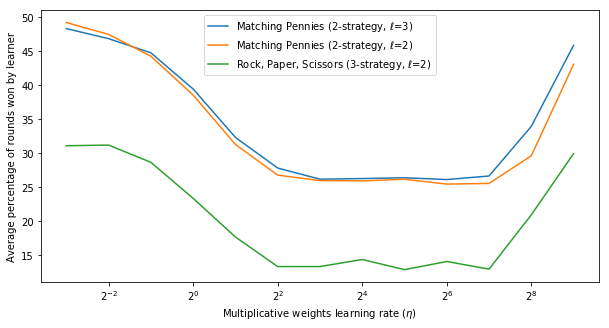

In [98]:
# Adversaries
etas = [0.125,0.25,0.5,1,2,4,8,16,32,64,128,256,512]

MP_userscore = np.array([96.52,98.8,99.63,100,100,100,100,100,100,100,100,100,100]) # average of 100
MP_learnerscore = np.array([90.28,87.07,80.76,65.13,47.79,38.56,35.48,35.65,35.87,35.38,36.35,51.42,84.73])
MP2_userscore = np.array([95.96,97.24,99.91,100,100,100,100,100,100,100,100,100,100]) # average of 100
MP2_learnerscore = np.array([92.99,87.89,79.36,62.76,45.55,36.59,35.1,35.02,35.47,34.17,34.34,42.1,75.67])
RPS_userscore = np.array([100,100,100,100,100,100,100,100,100,100,100,100,100]) # average of 20
RPS_learnerscore = np.array([45.15,45.35,40.2,30.5,21.5,15.4,15.4,16.8,14.8,16.4,14.9,26.5,42.75])

# Add up total number of rounds
MP_total = MP_userscore + MP_learnerscore
MP2_total = MP2_userscore + MP2_learnerscore
RPS_total = RPS_userscore + RPS_learnerscore

# Percentage of rounds won by the learner
MP_percent = MP_learnerscore / MP_total * 100
MP2_percent = MP2_learnerscore / MP2_total * 100
RPS_percent = RPS_learnerscore / RPS_total * 100

# Plot percentages
plt.figure(figsize=(10, 5))
plt.plot(etas, MP_percent)
plt.plot(etas, MP2_percent)
plt.plot(etas, RPS_percent)

plt.legend(["Matching Pennies (2-strategy, $\ell$=3)", "Matching Pennies (2-strategy, $\ell$=2)", "Rock, Paper, Scissors (3-strategy, $\ell$=2)"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percentage of rounds won by learner")
plt.xscale("log", basex=2)